In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

sns.set_theme(style="whitegrid", font_scale=1.5)

# Analysis of Bias Symptoms

Selected Datasets:

- Biased Dataset: `Adult Income dataset`
- Unbiased Dataset: `Kickstarter Projects dataset`

Steps:

- Train a Logistic Regression classifier on the training set
- Predict the label on the testing set
- Select from the testing set only binary columns with a permutation importance score $\geq 0.01$
- Compute the following metrics on the selected columns:
    - Permutation importance score
    - Correlation with the predicted label
    - Groups unbalance (defined as the ratio between expected and observed groups size, optimal value equal to 0)
    - Absolute Statistical parity (optimal value equal to 0)
    - Absolute Equalized odds (optimal value equal to 0)

## Biased Data

In [27]:
symptoms = pd.read_csv('symptoms_adult.csv', index_col=0)
symptoms.sort_values(by='equalized_odds', ascending=False, inplace=True)
symptoms = symptoms[symptoms["importance"] > 0.01]
symptoms['unbalance'] = abs(1-symptoms['unbalance'])
symptoms = symptoms.melt(
    id_vars=["variable"],
    value_vars=["importance", "correlation", "unbalance", "statistical_parity", "equalized_odds"],
    var_name="symptom",
)
symptoms['value'] = symptoms['value'].abs()

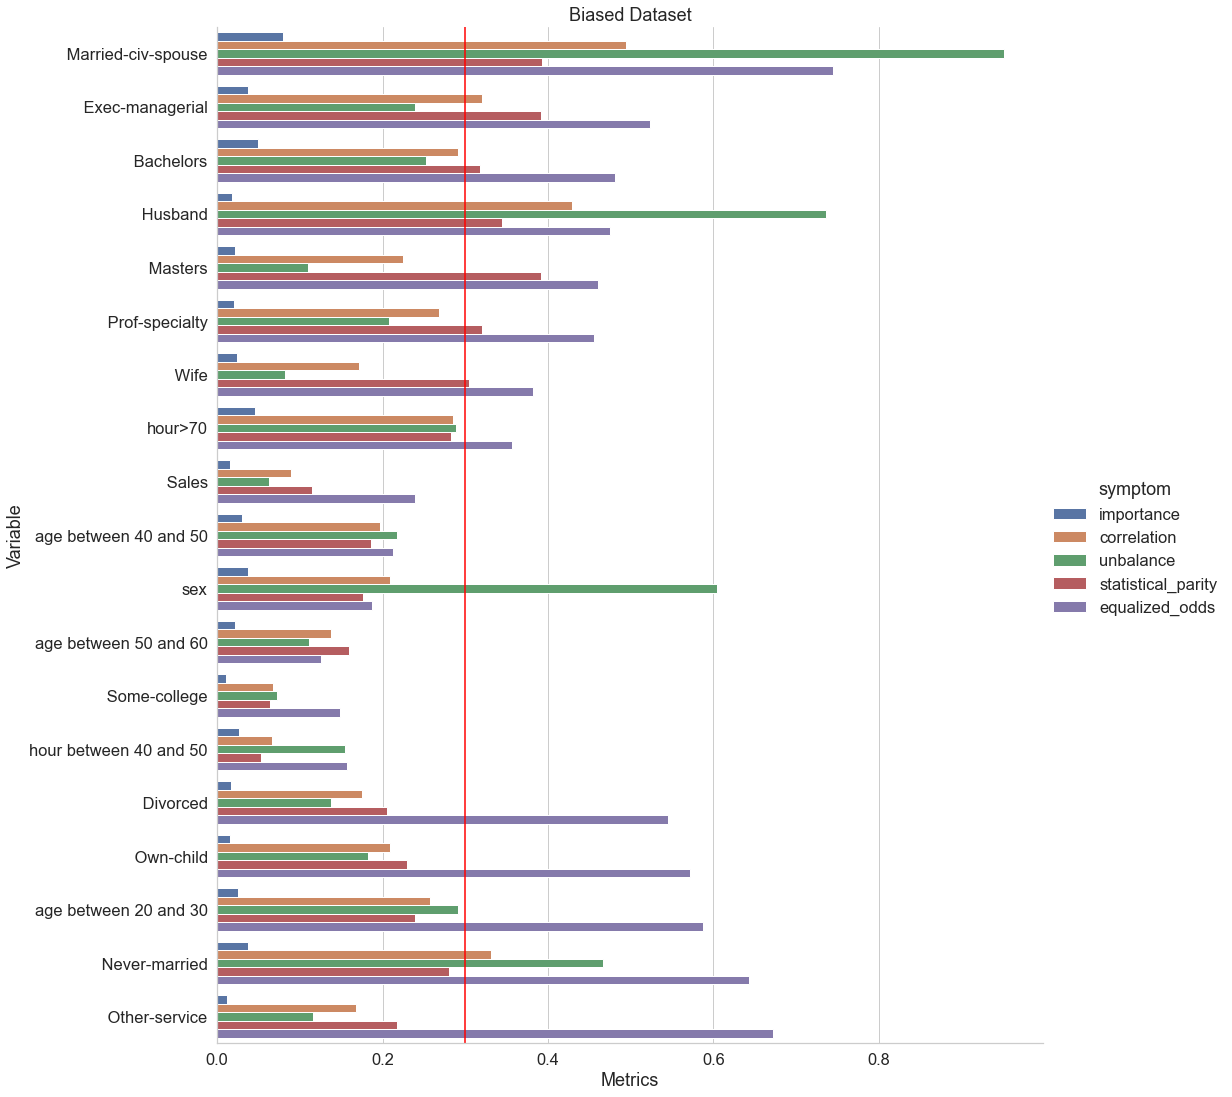

In [28]:
fig = sns.catplot(
    data=symptoms,
    y="variable",
    x="value",
    hue="symptom",
    kind="bar",
    height=15,
    aspect=1
)

plt.axvline(x=0.3, color='red')
plt.title("Biased Dataset")
plt.xlabel("Metrics")
plt.ylabel("Variable")
plt.show()

## Unbiased Data

In [29]:
symptoms_nob = pd.read_csv("symptoms_kickstarter_proc.csv", index_col=0)
symptoms_nob = symptoms_nob[symptoms_nob["importance"] > 0.005]
symptoms_nob.sort_values(by="statistical_parity", ascending=True, inplace=True)
symptoms_nob["unbalance"] = abs(1 - symptoms_nob["unbalance"])

symptoms_nob = symptoms_nob.melt(
    id_vars=["variable"],
    value_vars=[
        "importance",
        "correlation",
        "unbalance",
        "statistical_parity",
        "equalized_odds",
    ],
    var_name="symptom",

)
symptoms_nob["value"] = symptoms_nob["value"].abs()

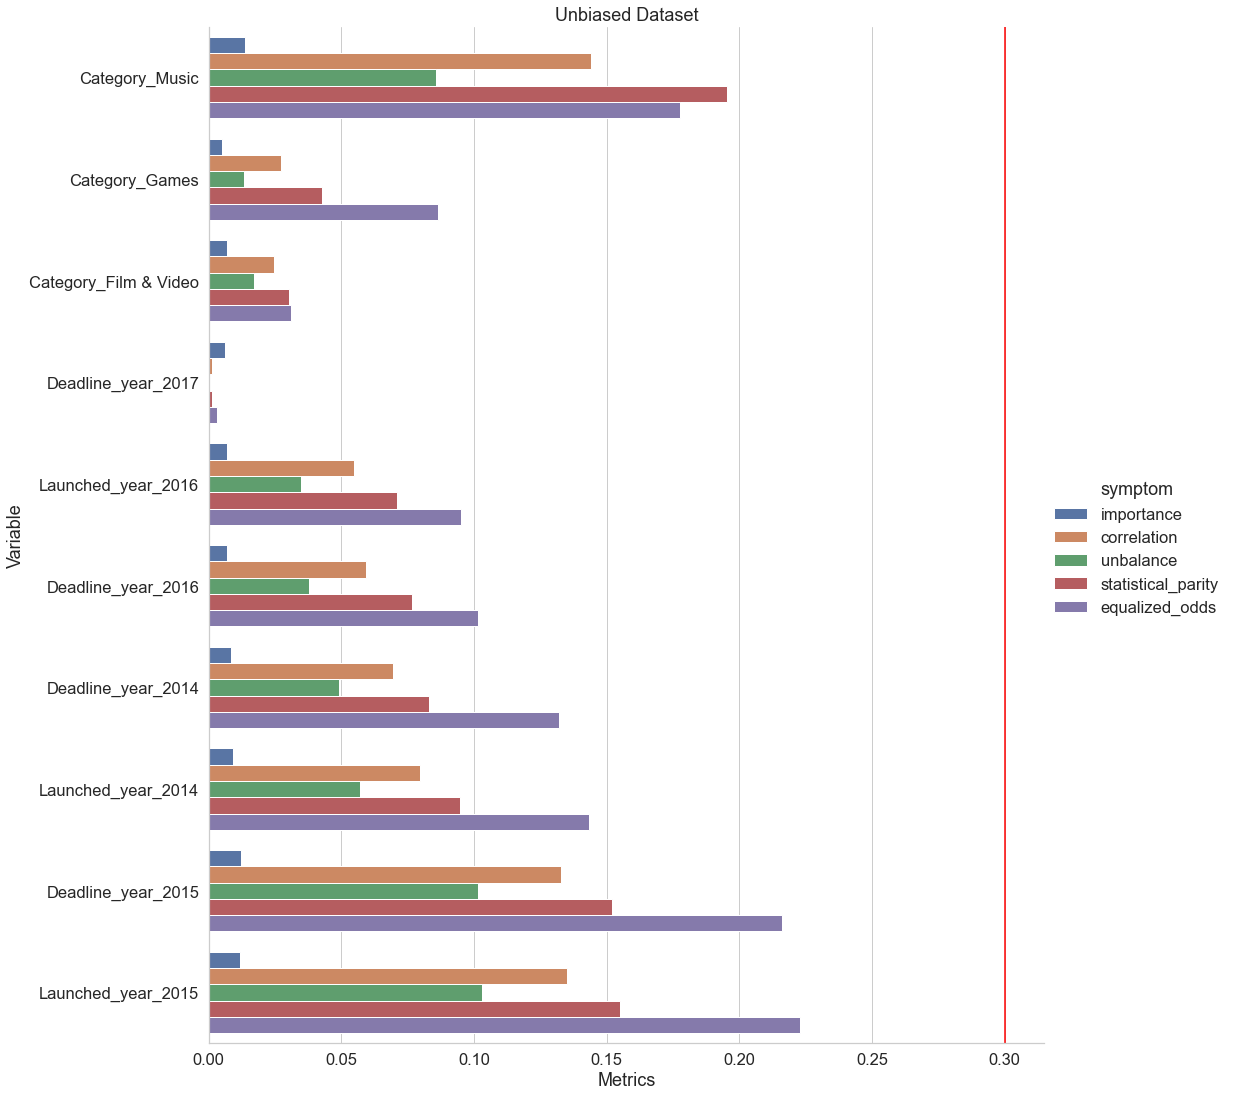

In [30]:
fig = sns.catplot(
    data=symptoms_nob,
    y="variable",
    x="value",
    hue="symptom",
    kind="bar",
    height=15,
    aspect=1
)

plt.axvline(x=0.3, color='red')
plt.xlabel("Metrics")
plt.ylabel("Variable")
plt.title("Unbiased Dataset")
plt.show()

## Correlation plots

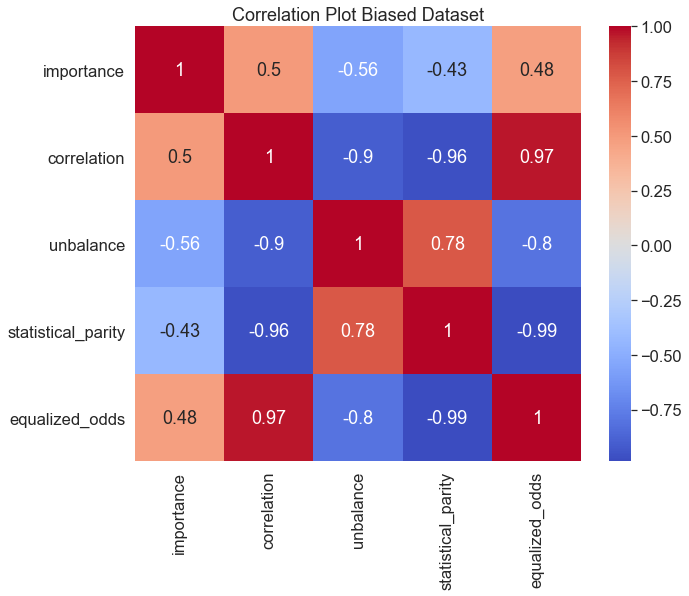

In [31]:
symptoms = pd.read_csv("symptoms_adult.csv", index_col=0)
symptoms = symptoms[symptoms["importance"] > 0.01]
correlation_matrix = symptoms.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Plot Biased Dataset")

plt.show()

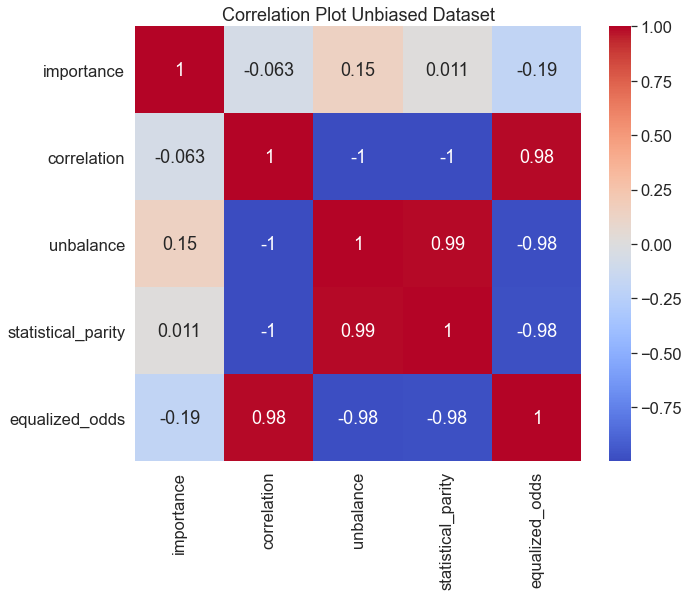

In [32]:
symptoms_nob = pd.read_csv("symptoms_kickstarter_proc.csv", index_col=0)
symptoms_nob = symptoms_nob[symptoms_nob["importance"] > 0.005]


correlation_matrix = symptoms_nob.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Plot Unbiased Dataset")

plt.show()

### Challenges

1. So far we consider only binary columns, but the analysis can be extended also to specific values of categorical columns. In this case, computing the fairness metric for each possible value can be extremely computationally complex.
2. We are not considering groups identified by multiple sensitive variables. In this case, we must consider all possible combinations of sensitive variables, which can be extremely computationally complex.